In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eig
from numpy.linalg import eig

In [3]:
data = np.array([[3,4],[2,8],[6,9],[10,12]])

In [4]:
data

array([[ 3,  4],
       [ 2,  8],
       [ 6,  9],
       [10, 12]])

In [5]:
df =pd.DataFrame(data, columns=["math","bio"])

In [6]:
df

,math,bio
0,3,4
1,2,8
2,6,9
3,10,12


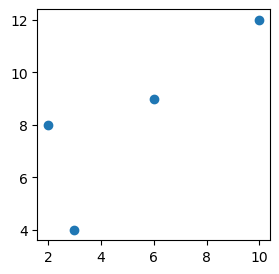

In [8]:
plt.figure(figsize=(3,3))
plt.scatter(df['math'], df['bio'])

#### 1. standardization
#### 2. find covariance
#### 3. eigen value and eigen vector.
#### 4. principle component

In [9]:
meanbycol = np.mean(data, axis=0)
meanbycol

array([5.25, 8.25])

In [12]:
scaled_data = data - meanbycol

In [13]:
scaled_data

array([[-2.25, -4.25],
       [-3.25, -0.25],
       [ 0.75,  0.75],
       [ 4.75,  3.75]])

In [15]:
stdbycol = np.std(data,axis=0)

In [19]:
scale_data = scaled_data/stdbycol
scaled_data

array([[-2.25, -4.25],
       [-3.25, -0.25],
       [ 0.75,  0.75],
       [ 4.75,  3.75]])

In [17]:
from sklearn.preprocessing import StandardScaler
st = StandardScaler()
st.fit_transform(df)

array([[-0.7228974 , -1.4852969 ],
       [-1.04418513, -0.08737041],
       [ 0.2409658 ,  0.26211122],
       [ 1.52611672,  1.31055608]])

In [20]:
scale_data.T

array([[-0.7228974 , -1.04418513,  0.2409658 ,  1.52611672],
       [-1.4852969 , -0.08737041,  0.26211122,  1.31055608]])

In [22]:
cov_mat = np.cov(scale_data.T)

In [23]:
cov_mat

array([[1.33333333, 1.07605651],
       [1.07605651, 1.33333333]])

In [24]:
eig_value,eig_vector=eig(cov_mat)

In [25]:
eig_value

array([2.40938985, 0.25727682])

In [26]:
eig_vector

array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])

In [27]:
scale_data

array([[-0.7228974 , -1.4852969 ],
       [-1.04418513, -0.08737041],
       [ 0.2409658 ,  0.26211122],
       [ 1.52611672,  1.31055608]])

In [30]:
eig_vector.T.dot(scale_data.T).T

array([[-1.56142916, -0.53909786],
       [-0.80013059,  0.67657018],
       [ 0.35572917,  0.01495207],
       [ 2.00583058, -0.15242439]])

In [31]:
from sklearn.decomposition import PCA
pca = PCA()

In [32]:
pca.fit_transform(scale_data) # principle component

array([[-1.56142916, -0.53909786],
       [-0.80013059,  0.67657018],
       [ 0.35572917,  0.01495207],
       [ 2.00583058, -0.15242439]])

In [34]:
pd.DataFrame(data=pca.fit_transform(scale_data),columns=["PC1","PC2"])

,PC1,PC2
0,-1.561429,-0.539098
1,-0.800131,0.676570
2,0.355729,0.014952
3,2.005831,-0.152424


In [36]:
pca.explained_variance_ratio_  # pc1 is showing 90 % of data spread and pc2 is showing 10% of the spread

array([0.90352119, 0.09647881])

In [37]:
sum(pca.explained_variance_ratio_ )

1.0

In [38]:
df=pd.read_csv("https://gist.githubusercontent.com/yifancui/e1d5ce0ba59ba0c275c0e2efed542a37/raw/dde7dbca24429542ff78964b83aaf064142dd771/data.csv")

In [41]:
df=df.drop(["Id number","Type of glass"],axis=1)

In [42]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0


In [43]:
scaler_df = st.fit_transform(df)

In [44]:
scaler_df

array([[ 0.87286765,  0.28495326,  1.25463857, ..., -0.14576634,
        -0.35287683, -0.5864509 ],
       [-0.24933347,  0.59181718,  0.63616803, ..., -0.79373376,
        -0.35287683, -0.5864509 ],
       [-0.72131806,  0.14993314,  0.60142249, ..., -0.82894938,
        -0.35287683, -0.5864509 ],
       ...,
       [ 0.75404635,  1.16872135, -1.86551055, ..., -0.36410319,
         2.95320036, -0.5864509 ],
       [-0.61239854,  1.19327046, -1.86551055, ..., -0.33593069,
         2.81208731, -0.5864509 ],
       [-0.41436305,  1.00915211, -1.86551055, ..., -0.23732695,
         3.01367739, -0.5864509 ]])

In [45]:
pca1 = PCA()
pca_data = pca1.fit_transform(scaler_df)

In [46]:
pd.DataFrame(pca_data)

,0,1,2,3,4,5,6,7,8
0,1.151140,-0.529488,-0.372096,1.728901,-0.251936,0.340210,-0.395600,-0.197160,0.016346
1,-0.574137,-0.759788,-0.556708,0.760232,-0.257071,-0.115960,-0.024158,-0.284214,-0.010790
2,-0.940160,-0.929836,-0.554907,0.206254,-0.237506,0.126630,-0.367518,-0.095941,0.021640
3,-0.142083,-0.961677,-0.117125,0.415724,-0.476299,0.285805,-0.052497,-0.002959,0.092035
4,-0.351092,-1.091249,-0.485079,0.069102,-0.432090,0.298032,0.158570,-0.191316,0.002315
...,...,...,...,...,...,...,...,...,...
209,-2.383835,3.061677,0.090445,-0.376611,0.103227,0.231162,-1.320186,0.189401,-0.028657
210,-2.397652,3.108236,-1.117502,0.288454,0.624723,0.618056,0.582361,0.131651,-0.013663
211,-1.680246,3.284823,-0.930349,-0.171014,0.451687,1.247320,0.674122,-0.891710,0.046284
212,-2.369748,2.756873,-1.234701,-0.525285,0.515008,1.003352,0.678899,0.074460,-0.027301


In [47]:
pca1.explained_variance_ratio_

array([2.79018192e-01, 2.27785798e-01, 1.56093777e-01, 1.28651383e-01,
       1.01555805e-01, 5.86261325e-02, 4.09953826e-02, 7.09477197e-03,
       1.78757536e-04])

In [48]:
max(pca1.explained_variance_ratio_)

0.2790181917945643

In [49]:
min(pca1.explained_variance_ratio_)

0.000178757535901725

In [50]:
sum(pca1.explained_variance_ratio_)

1.0000000000000002

In [51]:
sorted(pca1.explained_variance_ratio_)

[0.000178757535901725,
 0.007094771974823573,
 0.04099538259055585,
 0.0586261325220868,
 0.10155580523615626,
 0.12865138291980255,
 0.1560937771094049,
 0.22778579831670412,
 0.2790181917945643]

In [52]:
sorted(pca1.explained_variance_ratio_,reverse=True)

[0.2790181917945643,
 0.22778579831670412,
 0.1560937771094049,
 0.12865138291980255,
 0.10155580523615626,
 0.0586261325220868,
 0.04099538259055585,
 0.007094771974823573,
 0.000178757535901725]

In [53]:
#from the entire data we are extracting 95% info
sum(sorted(pca1.explained_variance_ratio_,reverse=True)[:6])*100

95.17310878987189

In [54]:
#from the entire data we are extracting 99% info
sum(sorted(pca1.explained_variance_ratio_,reverse=True)[:7])*100

99.27264704892748

In [55]:
var=pca1.explained_variance_ratio_
var

array([2.79018192e-01, 2.27785798e-01, 1.56093777e-01, 1.28651383e-01,
       1.01555805e-01, 5.86261325e-02, 4.09953826e-02, 7.09477197e-03,
       1.78757536e-04])

In [56]:
np.cumsum(var)

array([0.27901819, 0.50680399, 0.66289777, 0.79154915, 0.89310496,
       0.95173109, 0.99272647, 0.99982124, 1.        ])

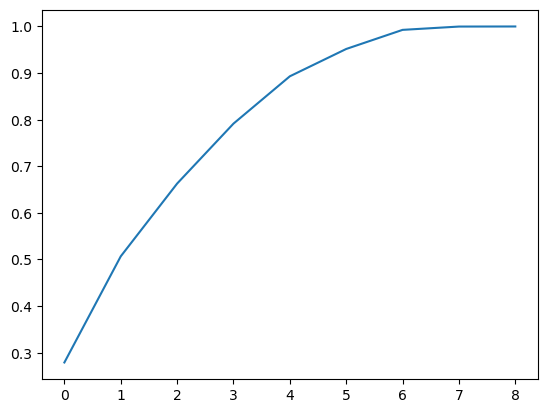

In [57]:
plt.plot(np.cumsum(var))
plt.show()